# Crawling Website Berita

## Crawling Web

In [ ]:
import requests
from bs4 import BeautifulSoup
import nltk

# Unduh konten halaman web berita
url = "https://www.antaranews.com/berita/3407430/malaysia-kutuk-peluncuran-rudal-balistik-korut?utm_source=antaranews&utm_medium=desktop&utm_campaign=terkini"
response = requests.get(url)
html = response.text

# Parsing halaman web menggunakan BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

# Ekstraksi teks dari elemen-elemen yang berisi berita
article = soup.find('div' ,class_="post-content clearfix")  # Sesuaikan dengan struktur HTML halaman web berita
article_text = article.get_text()

# Tokenisasi teks menjadi kalimat menggunakan nltk
nltk.download('punkt')  # Pastikan Anda sudah mengunduh tokenisasi kalimat nltk
sentences = nltk.sent_tokenize(article_text)

# Cetak kalimat-kalimat
for sentence in sentences:
    print(sentence)



				Kuala Lumpur (ANTARA) - Malaysia mengutuk peluncuran rudal balistik baru-baru ini oleh Korea Utara, termasuk peluncuran rudal balistik jarak antarbenua pada 18 Februari 2023.
Kementerian Luar Negeri Malaysia dalam keterangan pers dikeluarkan di Putrajaya, Selasa, menyebutkan Malaysia sangat menyesalkan kejadian itu yang merupakan ancaman serius untuk perdamaian dan keamanan dunia.
Tindakan Korea Utara tersebut hanya akan semakin meningkatkan ketegangan regional dan menghambat prospek perdamaian abadi di Semenanjung Korea.
Malaysia mendesak Korea Utara untuk menahan diri dari tindakan provokatif dan ilegal lebih lanjut, mematuhi kewajiban berdasarkan resolusi Dewan Keamanan PBB (DK PBB) yang relevan dengan komitmen internasional.
Malaysia juga mendesak Korea Utara untuk segera menghentikan program rudal nuklir dan balistik.
Pernyataan itu juga menyebutkan bahwa sangat  penting bagi pihak- pihak terkait untuk melanjutkan dialog guna mencapai denuklirisasi Semenanjung Korea yang leng

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## TF_IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi penghitung TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Hitung TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)

# Daftar kata kunci
feature_names = tfidf_vectorizer.get_feature_names_out()

# Konversi matriks TF-IDF menjadi bentuk yang lebih mudah dibaca
tfidf_values = tfidf_matrix.toarray()

# Cetak TF-IDF untuk setiap kata dalam setiap kalimat
for i, sentence in enumerate(sentences):
    print(f"Kalimat {i + 1}: {sentence}")
    for j, word in enumerate(feature_names):
        tfidf_value = tfidf_values[i][j]
        if tfidf_value > 0:
            print(f"{word}: {tfidf_value:.4f}")
    print()

Kalimat 1: 
				Kuala Lumpur (ANTARA) - Malaysia mengutuk peluncuran rudal balistik baru-baru ini oleh Korea Utara, termasuk peluncuran rudal balistik jarak antarbenua pada 18 Februari 2023.
18: 0.2063
2023: 0.1754
antara: 0.1754
antarbenua: 0.2063
balistik: 0.3068
baru: 0.4126
februari: 0.2063
ini: 0.2063
jarak: 0.1754
korea: 0.1107
kuala: 0.2063
lumpur: 0.2063
malaysia: 0.1364
mengutuk: 0.2063
oleh: 0.2063
pada: 0.2063
peluncuran: 0.3507
rudal: 0.2215
termasuk: 0.2063
utara: 0.1225

Kalimat 2: Kementerian Luar Negeri Malaysia dalam keterangan pers dikeluarkan di Putrajaya, Selasa, menyebutkan Malaysia sangat menyesalkan kejadian itu yang merupakan ancaman serius untuk perdamaian dan keamanan dunia.
ancaman: 0.2187
dalam: 0.2187
dan: 0.0886
di: 0.1446
dikeluarkan: 0.2187
dunia: 0.2187
itu: 0.1859
keamanan: 0.1859
kejadian: 0.2187
kementerian: 0.1446
keterangan: 0.2187
luar: 0.1859
malaysia: 0.2892
menyebutkan: 0.1859
menyesalkan: 0.2187
merupakan: 0.2187
negeri: 0.2187
perdamaian: 0.1

## Cosine Similarity antara Kalimat dan vektor tf-idf

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Indeks kalimat yang akan dibandingkan
sentence1_index = 0  # Ganti dengan indeks kalimat pertama yang ingin Anda bandingkan
sentence2_index = 1  # Ganti dengan indeks kalimat kedua yang ingin Anda bandingkan

# Ambil vektor TF-IDF untuk kedua kalimat
tfidf_vector1 = tfidf_matrix[sentence1_index]
tfidf_vector2 = tfidf_matrix[sentence2_index]

# Hitung cosine similarity antara kedua vektor
similarity = cosine_similarity(tfidf_vector1, tfidf_vector2)

# Cetak hasil cosine similarity
print(f"Cosine Similarity antara Kalimat {sentence1_index + 1} dan Kalimat {sentence2_index + 1}: {similarity[0][0]:.4f}")



Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.0394


## Cetak hasil similarity_matrix

In [ ]:
# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)

# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Cetak hasil similarity_matrix
num_sentences = len(sentences)  # Jumlah kalimat
for i in range(num_sentences):
    for j in range(i+1, num_sentences):
        similarity = similarity_matrix[i][j]
        print(f"Cosine Similarity antara Kalimat {i + 1} dan Kalimat {j + 1}: {similarity:.4f}")


Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.0394
Cosine Similarity antara Kalimat 1 dan Kalimat 3: 0.0512
Cosine Similarity antara Kalimat 1 dan Kalimat 4: 0.0445
Cosine Similarity antara Kalimat 1 dan Kalimat 5: 0.2039
Cosine Similarity antara Kalimat 1 dan Kalimat 6: 0.0117
Cosine Similarity antara Kalimat 1 dan Kalimat 7: 0.1337
Cosine Similarity antara Kalimat 1 dan Kalimat 8: 0.0290
Cosine Similarity antara Kalimat 1 dan Kalimat 9: 0.0441
Cosine Similarity antara Kalimat 1 dan Kalimat 10: 0.1278
Cosine Similarity antara Kalimat 2 dan Kalimat 3: 0.0774
Cosine Similarity antara Kalimat 2 dan Kalimat 4: 0.1117
Cosine Similarity antara Kalimat 2 dan Kalimat 5: 0.1156
Cosine Similarity antara Kalimat 2 dan Kalimat 6: 0.1343
Cosine Similarity antara Kalimat 2 dan Kalimat 7: 0.0213
Cosine Similarity antara Kalimat 2 dan Kalimat 8: 0.0940
Cosine Similarity antara Kalimat 2 dan Kalimat 9: 0.0259
Cosine Similarity antara Kalimat 2 dan Kalimat 10: 0.0280
Cosine Similarity antara Kali

## Menjadikan dataframe

In [ ]:
import pandas as pd

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Buat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Cetak DataFrame
df


,Kalimat 1,Kalimat 2,Kalimat 3,Kalimat 4,Kalimat 5,Kalimat 6,Kalimat 7,Kalimat 8,Kalimat 9,Kalimat 10
Kalimat 1,1.000000,0.039443,0.051220,0.044543,0.203947,0.011691,0.133676,0.029032,0.044145,0.127775
Kalimat 2,0.039443,1.000000,0.077378,0.111737,0.115566,0.134256,0.021267,0.094038,0.025876,0.027967
Kalimat 3,0.051220,0.077378,1.000000,0.097211,0.104628,0.076907,0.078505,0.039241,0.009280,0.021547
Kalimat 4,0.044543,0.111737,0.097211,1.000000,0.172311,0.048930,0.049495,0.008021,0.014432,0.013876
Kalimat 5,0.203947,0.115566,0.104628,0.172311,1.000000,0.101606,0.144110,0.039545,0.023360,0.129079
Kalimat 6,0.011691,0.134256,0.076907,0.048930,0.101606,1.000000,0.037377,0.042581,0.044260,0.057383
Kalimat 7,0.133676,0.021267,0.078505,0.049495,0.144110,0.037377,1.000000,0.090216,0.022973,0.269795
Kalimat 8,0.029032,0.094038,0.039241,0.008021,0.039545,0.042581,0.090216,1.000000,0.045910,0.125987
Kalimat 9,0.044145,0.025876,0.009280,0.014432,0.023360,0.044260,0.022973,0.045910,1.000000,0.021932
Kalimat 10,0.127775,0.027967,0.021547,0.013876,0.129079,0.057383,0.269795,0.125987,0.021932,1.000000


## Menampilkan nilai similarity pada matriks menggunakan matplotlib

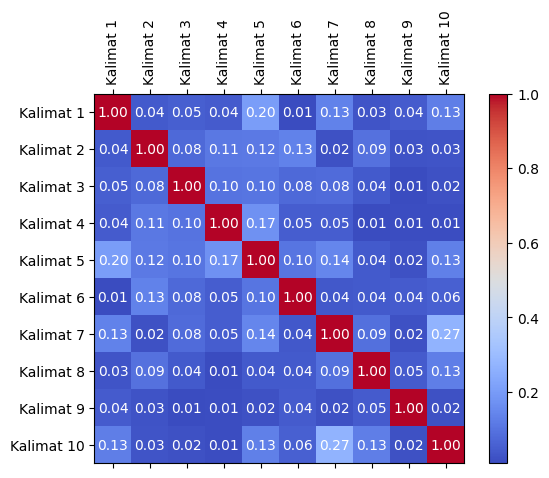

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Buat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Membuat grafik matriks
fig, ax = plt.subplots()
cax = ax.matshow(df, cmap='coolwarm')
fig.colorbar(cax)

# Memberi label pada sumbu X dan Y
ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.index)))
ax.set_xticklabels(df.columns, rotation=90)
ax.set_yticklabels(df.index)

# Menampilkan nilai similarity pada matriks
for i in range(len(df.index)):
    for j in range(len(df.columns)):
        text = ax.text(j, i, f'{df.iat[i, j]:.2f}', ha='center', va='center', color='w')

plt.show()


## Menampilkan menggunakan networkx

In [ ]:
import networkx as nx

# Buat grafik dari matriks similarity
G = nx.Graph()

# Tambahkan simpul (node) ke grafik yang mewakili setiap kalimat
for sentence in sentences:
    G.add_node(sentence)

# Tambahkan tepi (edge) antara kalimat berdasarkan similarity
for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
        similarity = df.iloc[i, j]  # Mengambil similarity dari DataFrame
        if similarity > 0:
            G.add_edge(sentences[i], sentences[j], weight=similarity)

# Hitung closeness centrality untuk setiap simpul
closeness_centrality = nx.closeness_centrality(G, distance='weight')

# Cetak closeness centrality
for sentence, centrality in closeness_centrality.items():
    print(f"Closeness Centrality of {sentence}: {centrality:.4f}")


Closeness Centrality of 
				Kuala Lumpur (ANTARA) - Malaysia mengutuk peluncuran rudal balistik baru-baru ini oleh Korea Utara, termasuk peluncuran rudal balistik jarak antarbenua pada 18 Februari 2023.: 23.6787
Closeness Centrality of Kementerian Luar Negeri Malaysia dalam keterangan pers dikeluarkan di Putrajaya, Selasa, menyebutkan Malaysia sangat menyesalkan kejadian itu yang merupakan ancaman serius untuk perdamaian dan keamanan dunia.: 26.5709
Closeness Centrality of Tindakan Korea Utara tersebut hanya akan semakin meningkatkan ketegangan regional dan menghambat prospek perdamaian abadi di Semenanjung Korea.: 30.9190
Closeness Centrality of Malaysia mendesak Korea Utara untuk menahan diri dari tindakan provokatif dan ilegal lebih lanjut, mematuhi kewajiban berdasarkan resolusi Dewan Keamanan PBB (DK PBB) yang relevan dengan komitmen internasional.: 34.4373
Closeness Centrality of Malaysia juga mendesak Korea Utara untuk segera menghentikan program rudal nuklir dan balistik.: 21.

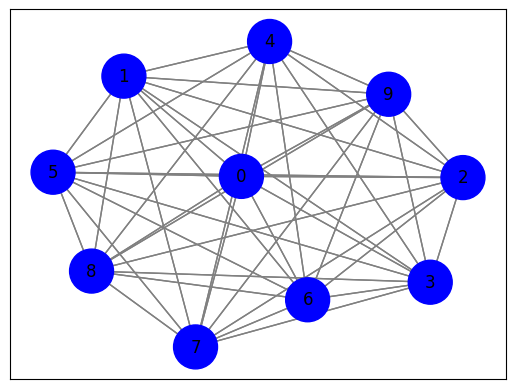

Closeness Centrality:
Node 0: 1.0000
Node 1: 1.0000
Node 2: 1.0000
Node 3: 1.0000
Node 4: 1.0000
Node 5: 1.0000
Node 6: 1.0000
Node 7: 1.0000
Node 8: 1.0000
Node 9: 1.0000


In [ ]:
import networkx as nx

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Buat grafik berarah (DiGraph) berdasarkan similarity_matrix
G = nx.DiGraph()
for i in range(len(similarity_matrix)):
    G.add_node(i)  # Tambahkan node dengan indeks numerik

for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix)):
        similarity = similarity_matrix[i][j]
        if similarity > 0 and i != j:  # Pastikan node tidak menghubungkan dirinya sendiri
            G.add_edge(i, j)

# Hitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Visualisasi closeness centrality
pos = nx.spring_layout(G)  # Atur layout grafik
node_size = [v * 1000 for v in closeness_centrality.values()]  # Ubah ukuran node berdasarkan closeness centrality, dengan faktor pengurangan ukuran

nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

# Cetak closeness centrality
print("Closeness Centrality:")
for node, closeness in closeness_centrality.items():
    print(f"Node {node}: {closeness:.4f}")
